In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#Count the number of rows and columns in the data set 
titanic.shape

(891, 15)

In [5]:
# to see only numerical columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Cleaning the Data

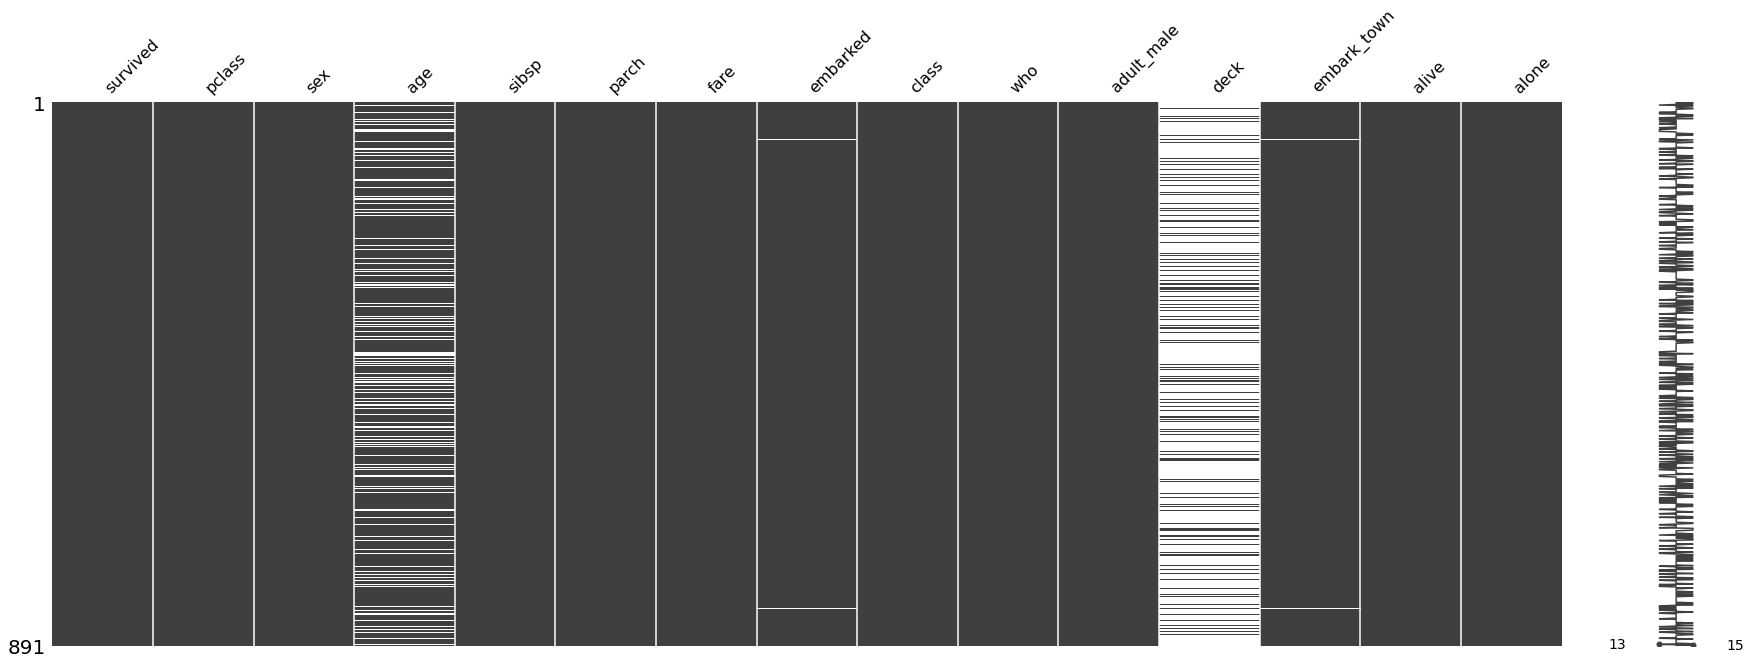

In [6]:
#observe missing data
import missingno
missingno.matrix(titanic,figsize=(30,10))

In [7]:
#check which rows are duplicates
#Look at all of the values in each column & get a count 
for val in titanic:
   print(titanic[val].value_counts())
   print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [8]:
# Drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])

In [9]:
#Count the NEW number of rows and columns in the data set
titanic.shape

(712, 8)

In [10]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [11]:
#Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [12]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


### EDA

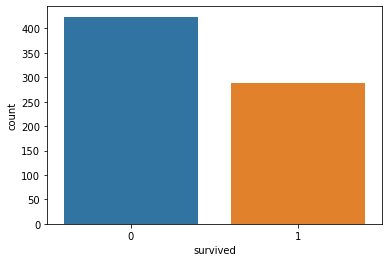

In [13]:
#Visualize the count of number of survivors
sns.countplot(titanic['survived'],label="Count")

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


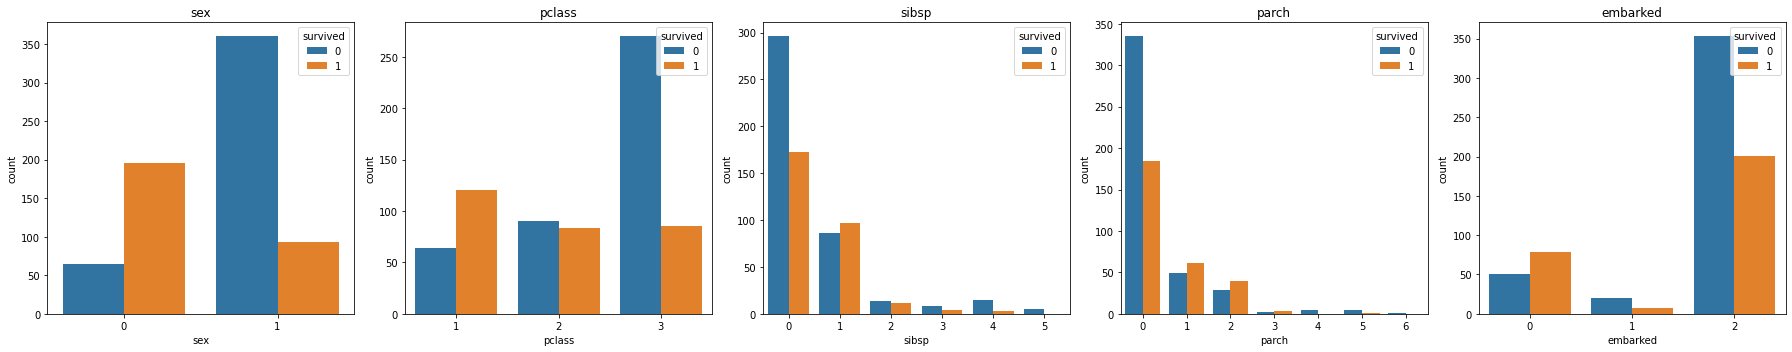

In [15]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = [ 'sex', 'pclass', 'sibsp', 'parch', 'embarked',]

n_rows = 1
n_cols = 5

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[i] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

In [16]:
#Look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
0,0.752896
1,0.205298


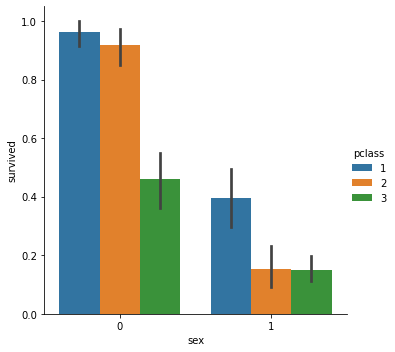

In [17]:
sns.catplot(data=titanic, kind="bar", x="sex", y="survived", hue="pclass")

In [18]:
#Look at survival rate by sex and pclass
titanic.pivot_table('survived', index='sex', columns='pclass')

pclass,1,2,3
sex,,,
0,0.963855,0.918919,0.460784
1,0.396040,0.151515,0.150198


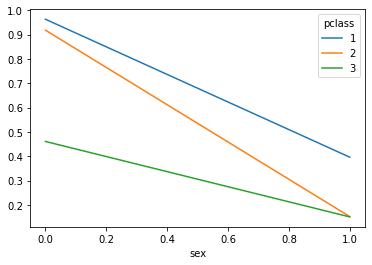

In [19]:
#Look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='pclass').plot()


In [20]:
#Look at survival rate by sex, age and class
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index=['sex', age], columns='pclass')

pclass               1         2         3
sex age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 80]  0.972222  0.900000  0.423729
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 80]  0.375000  0.071429  0.133663

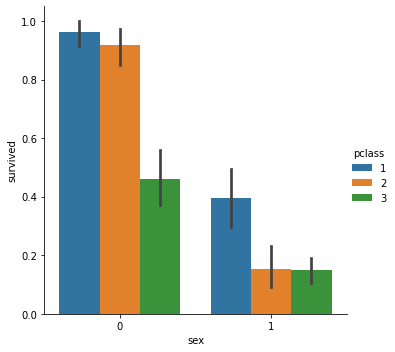

In [21]:
sns.catplot(data=titanic, kind="bar", x="sex", y="survived", hue="pclass")

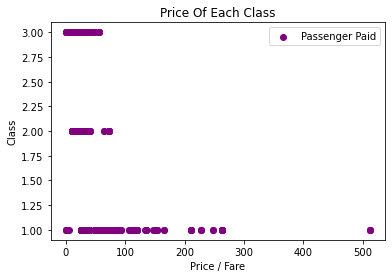

In [22]:
#Plot the Prices Paid Of Each Class
plt.scatter(titanic['fare'], titanic['pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

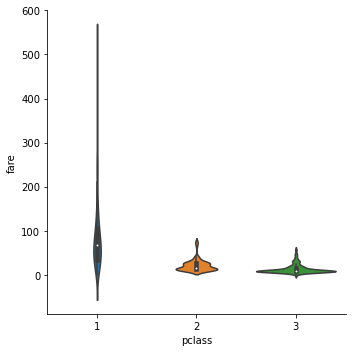

In [23]:
sns.catplot(data=titanic, kind="violin", x="pclass", y="fare")

### Machine Learning Model

In [24]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [26]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

### to find best n neighbours for knn

In [28]:
# to find best n neighbours for knn
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(2,14))}

knn = neighbors.KNeighborsRegressor()

grid_knn = GridSearchCV(knn, params, cv=5)
grid_knn.fit(X_train,Y_train)
grid_knn.best_params_

{'n_neighbors': 9}

### to find best parameters for gridsearch

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


#Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

#Create a GridSearchCV object and fit it to the training data
grid_svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_svc.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.4s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.5s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.2s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   2.3s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   5.4s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   1.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   2.2s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   2.2s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   9.6s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=  13.8s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=  10.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   9.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=  28.5s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [30]:
df2=pd.DataFrame(grid_svc.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014809,0.004405,0.003896,0.002177,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.675439,0.692982,0.684211,0.657895,0.654867,0.673079,0.014750,34
1,0.045067,0.012079,0.000902,0.000920,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.675439,0.815789,0.807018,0.771930,0.787611,0.771557,0.050419,20
2,0.020292,0.003477,0.004453,0.000714,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.710526,0.754386,0.728070,0.666667,0.752212,0.722372,0.032222,26
3,0.012583,0.002708,0.000721,0.000939,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.771930,0.824561,0.771930,0.807018,0.823009,0.799689,0.023483,4
4,0.011618,0.001463,0.001798,0.000807,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.719298,0.649123,0.631579,0.701754,0.681416,0.676634,0.032438,32
5,0.010496,0.001741,0.001958,0.001659,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.745614,0.815789,0.754386,0.780702,0.796460,0.778590,0.026003,11
6,0.012127,0.002861,0.003636,0.002147,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.719298,0.701754,0.640351,0.728070,0.707965,0.699488,0.030931,30
7,0.009312,0.002044,0.002331,0.001872,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.605263,0.605263,0.596491,0.596491,0.601770,0.601056,0.003939,42
8,0.016133,0.002127,0.003225,0.002303,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.614035,0.605263,0.596491,0.605263,0.601770,0.604565,0.005721,39
9,0.011322,0.002889,0.002263,0.000451,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.605263,0.605263,0.596491,0.596491,0.601770,0.601056,0.003939,42


In [31]:
df2[["param_C","param_gamma","param_kernel","mean_test_score"]]

,param_C,param_gamma,param_kernel,mean_test_score
0,0.1,1,rbf,0.673079
1,0.1,1,poly,0.771557
2,0.1,1,sigmoid,0.722372
3,0.1,0.1,rbf,0.799689
4,0.1,0.1,poly,0.676634
5,0.1,0.1,sigmoid,0.778590
6,0.1,0.01,rbf,0.699488
7,0.1,0.01,poly,0.601056
8,0.1,0.01,sigmoid,0.604565
9,0.1,0.001,rbf,0.601056


In [33]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
#dir(grid)


In [44]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2) #use use euclidean_distance 
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf',C=1, gamma=0.1, random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[3]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[4]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[5]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_rbf, gauss, tree, forest

In [45]:
# Training Accuracy scores of all the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8506151142355008
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8383128295254832
[3]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[4]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[5]Random Forest Classifier Training Accuracy: 0.9753954305799648


In [36]:
# Testing Accuracy scores of all the models

from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111 !"

[[71 11]
 [19 42]]
Model[1] Testing Accuracy = "0.7902097902097902 !"

[[73  9]
 [18 43]]
Model[2] Testing Accuracy = "0.8111888111888111 !"

[[69 13]
 [23 38]]
Model[3] Testing Accuracy = "0.7482517482517482 !"

[[60 22]
 [10 51]]
Model[4] Testing Accuracy = "0.7762237762237763 !"

[[67 15]
 [13 48]]
Model[5] Testing Accuracy = "0.8041958041958042 !"



In [42]:
#Get the importance of the features
forest = model[5] #random forest classifier
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


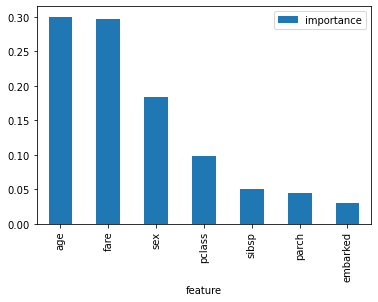

In [46]:
#Visualize the importance
importances.plot.bar()

In [37]:

#Print Prediction of Random Forest Classifier model
pred = model[5].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [53]:
my_survival = [[3,1,21,0, 0, 0, 1]]
#Print Prediction of Random Forest Classifier model
pred = model[5].predict(my_survival)
print(pred)

if pred == 0:
    print("Oh no! You didn't make it")
else:
    print('Nice! You survived')

[0]
Oh no! You didn't make it
